In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression 

admissions=pd.read_csv('admissions.csv')
admissions['actual_label']=admissions['admit']
admissions=admissions.drop("admit",axis=1)
admissions.head()

,gpa,gre,actual_label
0,3.177277,594.102992,0
1,3.412655,631.528607,0
2,2.728097,553.714399,0
3,3.093559,551.089985,0
4,3.141923,537.184894,0


In [2]:
import numpy as np
np.random.seed(10)
admissions=pd.read_csv("admissions.csv")
admissions['actual_label']=admissions['admit']
admissions=admissions.drop('admit',axis=1)
shuffled_index=np.random.permutation(admissions.index)#洗牌操作 
shuffled_admissions=admissions.loc[shuffled_index]
print(shuffled_index)
train=shuffled_admissions.iloc[0:515]
test=shuffled_admissions.iloc[515:len(shuffled_admissions)]
print(shuffled_admissions.head())

[408 442 299  27 591 277 524 525 142 173 305 518 508 271 566 629 477 381
 211 457 278  45  52 176  35  43 576 249 244 448 378 152 223 317 399  57
 172 191  64 556 327 230 419 175 157 444  33 584 514 558   7 235 516  92
 417 481 424 473 334 551 394 161  12 102 563 253  31 445  22 581 396 326
 192 573 485 197 370 343 169 254 540  24 519 484  65 426 375  76 131 266
 497  16   6 504 295 183 261 236 482  69 520  97 229 280 284 367  68 642
 194 322 333 425 309 599  34 565 181  47 428 608 507 282 312  78 500 463
 110 218 433 374 257 466 499 402  84 105 509  72 276 616 238 222 233 100
 379 217 403 351 383 193 237 242 562 163 391 190 171 467 387 632 529 140
   1 491 492 279 109 116 307 353 167 626 151 586 474 536 487 405 220 260
 153  56 252 441 512 107 302 121  70 264 452 272 625 349 479 389 285 603
 489 179 293 304  91 262  94 296 323 118  80 154  88 617 203 447 136 245
  96 114 521 539 228 628  98 231 332 329 166 195 240 585 579 215 126 241
 188 620 610  61 146 458 339 392 639  59 559  50 41

In [3]:
shuffled_index=np.random.permutation(admissions.index)
shuffled_admissions=admissions.loc[shuffled_index]
train=shuffled_admissions.iloc[0:515]
test=shuffled_admissions.iloc[515:len(shuffled_admissions)]

In [4]:
model=LogisticRegression()
model.fit(train[['gpa']],train['actual_label'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
labels=model.predict(test[['gpa']])
test['predicted_label']=labels

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


test.head()

In [6]:
test.head()

,gpa,gre,actual_label,predicted_label
531,3.605576,570.617519,1,0
407,4.000000,544.159398,1,0
93,2.983736,714.828025,1,0
96,2.770605,695.273684,1,0
226,3.353993,764.430488,1,0


In [7]:
matches=test['predicted_label']==test['actual_label']
correct_predictions=test[matches]

In [8]:
matches.head()

531    False
407    False
93     False
96     False
226    False
dtype: bool

In [9]:
correct_predictions.head()

,gpa,gre,actual_label,predicted_label


In [10]:
accuracy=len(correct_predictions)/float(len(test))

In [11]:
accuracy

0.0

In [12]:
import matplotlib.pyplot as plt 
from sklearn import metrics


In [13]:
probabilities=model.predict_proba(test[['gpa']])

In [14]:
fpr,tpr,thresholds=metrics.roc_curve(test['actual_label'],probabilities[:,1])

/Users/nanji/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/ranking.py:534: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


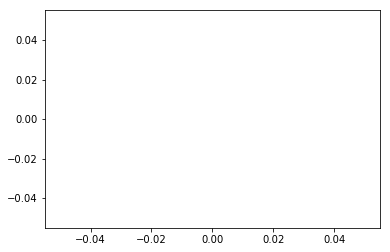

In [15]:
plt.plot(fpr,tpr)
plt.show()

In [16]:
print(thresholds)

[0.33717948 0.1541769 ]


In [17]:
from sklearn.metrics import roc_auc_score
probabilities=model.predict_proba(test[['gpa']])


In [18]:
auc_score=roc_auc_score(test['actual_label'],probabilities[:,1])

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [19]:
print(auc_score)

NameError: name 'auc_score' is not defined